In [152]:
import os
import time

import duckdb
import pandas as pd
import plotly.express as px
import pyarrow.parquet as pq

from common.env_variables import DUCKDB_DWH_FILE, CURATED_DIR, DATA_SOURCE_NAME
from common.storage import load_cleansed_df
from common.entity import SITEMAP, JOB_ONLINE

In [153]:
conn = duckdb.connect(DUCKDB_DWH_FILE)

In [154]:
entity = JOB_ONLINE

In [155]:
start_time = time.time()
df = conn.execute(f'''
SELECT *
FROM src_{entity.name}
WHERE
    year = 2022 AND
    month = 9 AND
    day = 1
;
''').df()
print("--- %s seconds ---" % (time.time() - start_time))
print(df)

--- 0.24053597450256348 seconds ---
         job_id load_timestamp  online_at  \
0       8653943     2022-09-01 2022-09-01   
1       8653944     2022-09-01 2022-09-01   
2       8653945     2022-09-01 2022-09-01   
3       8653946     2022-09-01 2022-09-01   
4       8653947     2022-09-01 2022-09-01   
...         ...            ...        ...   
146353  8653938     2022-09-01 2022-09-01   
146354  8653939     2022-09-01 2022-09-01   
146355  8653940     2022-09-01 2022-09-01   
146356  8653941     2022-09-01 2022-09-01   
146357  8653942     2022-09-01 2022-09-01   

                                                      url  \
0       https://www.stepstone.de/stellenangebote--Refe...   
1       https://www.stepstone.de/stellenangebote--IT-B...   
2       https://www.stepstone.de/stellenangebote--Supp...   
3       https://www.stepstone.de/stellenangebote--Stud...   
4       https://www.stepstone.de/stellenangebote--Elek...   
...                                                   ...

In [156]:
start_time = time.time()
df = conn.execute(f'''
SELECT *
FROM count_job_online_by_date
;
''').df()
print('--- %s seconds ---' % (time.time() - start_time))
print(df)

--- 0.767909049987793 seconds ---
     online_at    jobs
0   2021-10-09  113858
1   2021-10-10  111325
2   2021-10-11  111745
3   2021-10-12  114141
4   2021-10-13  116319
..         ...     ...
338 2022-09-12  138797
339 2022-09-13  140284
340 2022-09-14  142679
341 2022-09-15  144670
342 2022-09-16  145505

[343 rows x 2 columns]


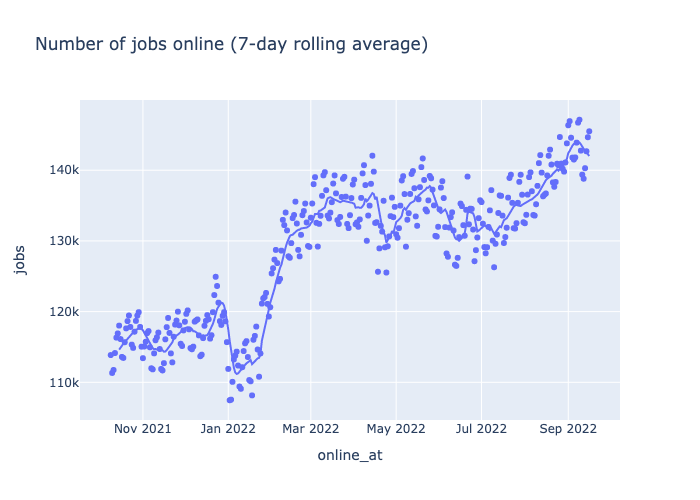

In [157]:
fig = px.scatter(df, x='online_at', y='jobs', trendline='rolling', trendline_options=dict(window=7),
                 title='Number of jobs online (7-day rolling average)')
fig.show('png')


In [158]:
conn.close()